In [1]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

np.random.seed(42)

dates = pd.date_range(start="2023-01-01", end="2024-12-31", freq="D")

trend = np.linspace(100, 200, len(dates))
weekly = 20 * np.sin(2 * np.pi * dates.dayofweek / 7)
yearly = 30 * np.sin(2 * np.pi * dates.dayofyear / 365)

rain = np.random.binomial(1, 0.3, len(dates))
rain_effect = rain * -40

noise = np.random.normal(0, 15, len(dates))

rides = trend + weekly + yearly + rain_effect + noise

df = pd.DataFrame({
    "ds": dates,
    "y": rides,
    "rain": rain.astype(int)
})

df.head()

,ds,y,rain
0,2023-01-01,93.032018,0
1,2023-01-02,76.693449,1
2,2023-01-03,44.337594,1
3,2023-01-04,127.385266,0
4,2023-01-05,107.751514,0


In [2]:
split_idx = int(len(df) * 0.8)

train_df = df.iloc[:split_idx]
test_df = df.iloc[split_idx:]

print("Train size:", len(train_df))
print("Test size:", len(test_df))

Train size: 584
Test size: 147


In [3]:
# Sort data by date
df = df.sort_values("ds")

# Train-test split (80% train, 20% test)
train_size = int(len(df) * 0.8)
train = df.iloc[:train_size]
test = df.iloc[train_size:]

In [4]:
model = Prophet()
model.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [5]:
model = Prophet(interval_width=0.8)

model.fit(train_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [6]:
future_test = test[["ds"]]
forecast_test = model.predict(future_test)

In [7]:
future = model.make_future_dataframe(periods=len(test_df), freq="D")
future["rain"] = df["rain"].values

forecast = model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
726,2024-12-27,152.796780,107.119947,180.231932,135.205088,169.835446,-9.177215,-9.177215,-9.177215,-9.177215,-9.177215,-9.177215,0.0,0.0,0.0,143.619566
727,2024-12-28,152.723508,98.912344,173.366737,134.981404,169.958276,-17.764389,-17.764389,-17.764389,-17.764389,-17.764389,-17.764389,0.0,0.0,0.0,134.959118
728,2024-12-29,152.650235,97.562667,170.052994,134.764842,170.083059,-18.528657,-18.528657,-18.528657,-18.528657,-18.528657,-18.528657,0.0,0.0,0.0,134.121579
729,2024-12-30,152.576963,117.925328,193.089771,134.403918,170.223440,2.483149,2.483149,2.483149,2.483149,2.483149,2.483149,0.0,0.0,0.0,155.060112
730,2024-12-31,152.503691,131.594882,204.788566,134.097426,170.321613,14.536920,14.536920,14.536920,14.536920,14.536920,14.536920,0.0,0.0,0.0,167.040610


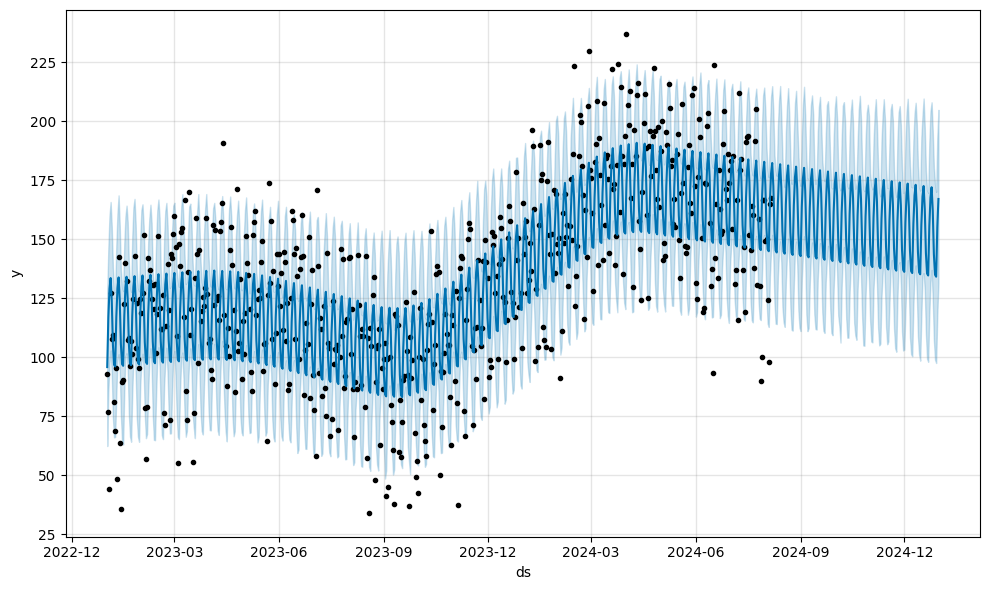

In [8]:
model.plot(forecast)
plt.show()

In [9]:
y_true = test_df["y"].values
y_pred = forecast.iloc[-len(test_df):]["yhat"].values

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 19.490522349739116
RMSE: 24.855888038792504


In [10]:
import pickle

with open("prophet_model.pkl", "wb") as f:
    pickle.dump(model, f)

## to download the forecast results

In [11]:
forecast_download = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [12]:
forecast_download.to_csv('forecast_results.csv', index=False)

In [13]:
from google.colab import files
files.download('forecast_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## to download the dataframe

In [14]:

original_data = df[['ds', 'y', 'rain']]

In [15]:
original_data.to_csv('original_data.csv', index=False)

In [16]:
from google.colab import files
files.download('original_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>